In [1]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 2000x2000 with 2 Axes>

In [2]:
vehicle_objects = SG_1.vehicle_objects_dict

for vehicle_dict_id in vehicle_objects:
    print("vehicle object:  ", vehicle_objects[vehicle_dict_id])
    print("vehicle_info:    ", vehicle_objects[vehicle_dict_id].vehicle_info)
    
    #Initial_state usage
    print("**vehicle_info.initial_state:    ", (vehicle_objects[vehicle_dict_id].vehicle_info["initial_state"]))
    print("vehicle_initial_state:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state)
    print("vehicle_initial_state.velocity:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.velocity)
    print("vehicle_initial_state.position:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.position)
    
    
    print("vehicle_graph:   ", vehicle_objects[vehicle_dict_id].vehicle_graph)
    print("distance_sensor: ", vehicle_objects[vehicle_dict_id].distance_sensor)
    print("distance_sensor.vehicles_in_range: ", vehicle_objects[vehicle_dict_id].distance_sensor.vehicles_in_range)
    print("score_array:     ", vehicle_objects[vehicle_dict_id].score_dict)
    print("group_array:     ", vehicle_objects[vehicle_dict_id].group_array)
    print("knowledge_base:  ", vehicle_objects[vehicle_dict_id].knowledge_base)
    
    print("___________________________________________________________________________________________________")

vehicle object:   <Vehicle.Vehicle object at 0x7f4424cfa210>
vehicle_info:     {'id': -1, 'initial_position': array([ 67.348 , 377.2854]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7f43f819bb90>, 'initial_lanelet_id': 59, 'initial_lanelet_node': 0, 'planning_problem_id': 1}
**vehicle_info.initial_state:     
position= [ 67.348  377.2854]
orientation= -2.4137
velocity= 22.699
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

vehicle_initial_state:     
position= [ 67.348  377.2854]
orientation= -2.4137
velocity= 22.699
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

vehicle_initial_state.velocity:     22.699
vehicle_initial_state.position:     [ 67.348  377.2854]
vehicle_graph:    <GraphBasedDistanceMeasure.ScenarioGraph object at 0x7f43f7da2fd0>
distance_sensor:  <Sensor.DistanceSensor object at 0x7f43fa93e6d0>
distance_sensor.vehicles_in_range:  [318, 321, 327, 328]
score_array:      {318: 0.0, 321: 0.0, 327: 0.0, 328: 23.78465348598317}
group_array:      [328]
knowledg

In [3]:
#find unique groups
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
print(visualization_function.vehicle_id_group_id)

for vehicle in SG_1.vehicle_objects_dict:
    print(vehicle, SG_1.vehicle_objects_dict[vehicle].group_array)

{-1: 1, 328: 1, 35: 2, 39: 2, 311: 2, 315: 2, 318: 2, 313: 2, 317: 2, 320: 2, 321: 1, 327: 3, 329: 3, 330: 3}
-1 [328]
35 [39, 311, 315, 318, 313]
39 [35, 315]
311 [35, 315]
313 [35]
315 [35, 39, 311, 317, 320]
317 [315, 320]
318 [35, 328]
319 []
320 [315, 317]
321 [328]
322 []
323 []
324 []
326 []
327 [329, 330]
328 [-1, 318, 321]
329 [327]
330 [327]
331 []


In [4]:
#best groups for each vehicle in the all groups
import numpy as np
all_groups = list()
for v_o in SG_1.vehicle_objects_dict:
    all_groups.append(SG_1.vehicle_objects_dict[v_o].group_array)
print(all_groups)

[[328], [39, 311, 315, 318, 313], [35, 315], [35, 315], [35], [35, 39, 311, 317, 320], [315, 320], [35, 328], [], [315, 317], [328], [], [], [], [], [329, 330], [-1, 318, 321], [327], [327], []]


In [5]:
print(visualization_function.group_id_vehicle_ids)
print(visualization_function.vehicle_id_group_id)

{1: [328, -1, 321], 2: [39, 35, 311, 315, 318, 313, 317, 320], 3: [329, 327, 330]}
{-1: 1, 328: 1, 35: 2, 39: 2, 311: 2, 315: 2, 318: 2, 313: 2, 317: 2, 320: 2, 321: 1, 327: 3, 329: 3, 330: 3}


In [6]:
#take the groups results constracted after decisions of vehicles = gcbvd
#put them together in a list = all_groups
gcbvd = visualization_function.group_id_vehicle_ids
print(gcbvd)
all_groups = []
for k in gcbvd:
    all_groups.append(gcbvd[k])
    
print(all_groups)

{1: [328, -1, 321], 2: [39, 35, 311, 315, 318, 313, 317, 320], 3: [329, 327, 330]}
[[328, -1, 321], [39, 35, 311, 315, 318, 313, 317, 320], [329, 327, 330]]


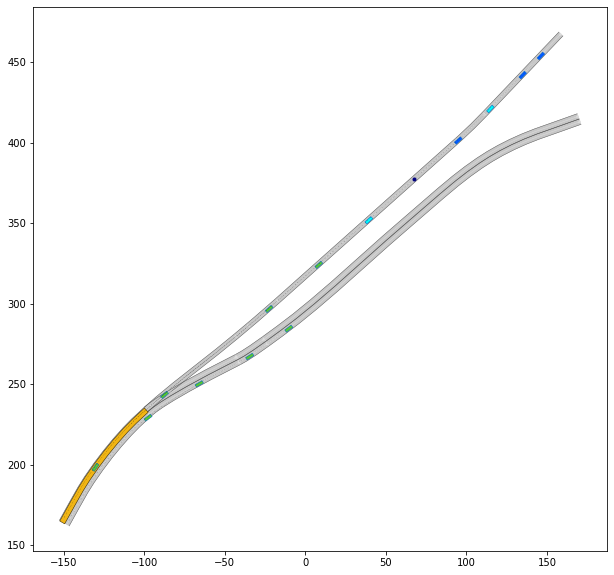

In [7]:
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
#print(visualization_function.group_ids)

import os
import matplotlib.pyplot as plt
from IPython import display
from brute_force import calculate_score
import commonroad.planning
# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object
import scenarios 
import matplotlib.patches as patches
from brute_force import Colorize_groups
import Convert_groups

groups=[]
# calculate_scores
grouparray= all_groups
print(all_groups)

for group in grouparray:
    groups.append(Convert_groups.conv_to_obj(scenario, planning_problem_set, group))

print(all_groups)
# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step   
    
    ax = plt.gca()
    
    draw_object(scenario.lanelet_network,draw_params={'time_begin': i}) #, plot_limits=plot_limits)
    time = i
    Colorize_groups.colorize_groups(groups, ax, time, visualization_function.vehicle_id_group_id)
    #raw_object(commonroad.planning.planning_problem.PlanningProblemSet.find_planning_problem_by_id(planning_problem_set, 2), draw_params=draw_params)
    #ect=patches.Rectangle((0,0),5,2,linewidth=1,edgecolor='#880000', facecolor='#998822')
    #x.add_patch(rect)
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()
    break

In [8]:
list1 = [1, 2]
list2 = [1, 3]
set(list1).intersection(list2)

{1}